In [3]:
import numpy as np
import os
from sklearn.utils import shuffle
from imblearn.combine import SMOTEENN
from PIL import Image
import pickle

In [2]:
import cv2

def reshape_images(folder_path, new_width, new_height):
    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Error: Unable to read image '{filename}'")
                continue
            
            # Resize the image
            resized_img = cv2.resize(img, (new_width, new_height))
            
            # Save the resized image
            cv2.imwrite(image_path, resized_img)
            print(f"Resized and saved '{filename}'")

In [7]:
folder_path = './data/Dataset/Non_Demented/'
new_width = 170
new_height = 170

reshape_images(folder_path, new_width, new_height)

Resized and saved 'OAS1_0001_MR1_mpr-1_100.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_101.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_102.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_103.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_104.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_105.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_106.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_107.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_108.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_109.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_110.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_111.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_112.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_113.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_114.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_115.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_116.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_117.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_118.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_119.jpg'
Resized and saved 'OAS1_0001_MR1_mpr-1_1

In [10]:
def save_random_images(folder_path, num_images=5000, output_folder=None):
    # Get list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select num_images from the list
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    # Create output folder if not provided
    if output_folder is None:
        output_folder = os.path.join(folder_path, "random_images")
        os.makedirs(output_folder, exist_ok=True)

    # Copy selected images to the output folder
    for image_name in selected_images:
        image_path = os.path.join(folder_path, image_name)
        shutil.copy(image_path, output_folder)

In [12]:
folder_path = "./data/Dataset/Very_Mild_Demented"
save_random_images(folder_path)

In [1]:
def load_and_preprocess_images(folder_path):
    images = []
    labels = []

    for class_label, class_folder in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_folder)
        for file_name in os.listdir(class_path):
            image_path = os.path.join(class_path, file_name)
            # Read and resize images to a consistent size (e.g., 100x100) using Pillow
            img = Image.open(image_path).convert('RGB')
            img = img.resize((150, 150))  # Adjust size as needed
            images.append(np.array(img))
            labels.append(class_folder)

    return np.array(images), np.array(labels)

In [4]:
image_folder_path = "./data/Dataset/"
X, y =load_and_preprocess_images(image_folder_path)

In [5]:
# Combine SMOTE and ENN for resampling
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X.reshape(-1, 150*150*3),y)

In [6]:
# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

In [7]:
# Save the resampled images to a new folder
resampled_folder_path = "./data/Resampled_dataset/"
for i, (image, label) in enumerate(zip(X_resampled, y_resampled)):
    class_folder = os.path.join(resampled_folder_path, label)
    os.makedirs(class_folder, exist_ok=True)
    image_path = os.path.join(class_folder, f'image_{i}.jpg')
    Image.fromarray(image.reshape(150, 150, 3).astype('uint8')).save(image_path)

# Split dataset

In [1]:
import os
import shutil
import random

def split_dataset(input_dir, output_dir1, output_dir2, output_dir3, split_ratio1=0.6, split_ratio2=0.2):
    # Get the list of image files in the input directory
    image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Shuffle the list of files for randomness (optional)
    random.shuffle(image_files)

    # Calculate the split indices
    split_index1 = int(len(image_files) * split_ratio1)
    split_index2 = int(len(image_files) * (split_ratio1 + split_ratio2))

    # Split the list into three parts
    first_part = image_files[:split_index1]
    second_part = image_files[split_index1:split_index2]
    third_part = image_files[split_index2:]

    # Copy or move the files to the output directories
    copy_files(first_part, input_dir, output_dir1)
    copy_files(second_part, input_dir, output_dir2)
    copy_files(third_part, input_dir, output_dir3)

def copy_files(file_list, source_dir, dest_dir):
    for file in file_list:
        source_path = os.path.join(source_dir, file)
        dest_path = os.path.join(dest_dir, file)
        shutil.copy(source_path, dest_path)  # Use shutil.move if you want to move instead of copy


In [9]:
input_folder = './data/Resampled_dataset/Mild_Demented/'
output_train = './data/train/Mild_Demented/'
output_val = './data/val/Mild_Demented/'
output_test = './data/test/Mild_Demented/'

os.makedirs(output_train, exist_ok=True)
os.makedirs(output_val, exist_ok=True)
os.makedirs(output_test, exist_ok=True)

split_dataset(input_folder, output_train, output_val, output_test)

In [10]:
input_folder = './data/Resampled_dataset/Moderate_Demented/'
output_train = './data/train/Moderate_Demented/'
output_val = './data/val/Moderate_Demented/'
output_test = './data/test/Moderate_Demented/'

os.makedirs(output_train, exist_ok=True)
os.makedirs(output_val, exist_ok=True)
os.makedirs(output_test, exist_ok=True)

split_dataset(input_folder, output_train, output_val, output_test)

In [11]:
input_folder = './data/Resampled_dataset/Non_Demented/'
output_train = './data/train/Non_Demented/'
output_val = './data/val/Non_Demented/'
output_test = './data/test/Non_Demented/'

os.makedirs(output_train, exist_ok=True)
os.makedirs(output_val, exist_ok=True)
os.makedirs(output_test, exist_ok=True)

split_dataset(input_folder, output_train, output_val, output_test)

In [12]:
input_folder = './data/Resampled_dataset/Very_Mild_Demented/'
output_train = './data/train/Very_Mild_Demented/'
output_val = './data/val/Very_Mild_Demented/'
output_test = './data/test/Very_Mild_Demented/'

os.makedirs(output_train, exist_ok=True)
os.makedirs(output_val, exist_ok=True)
os.makedirs(output_test, exist_ok=True)

split_dataset(input_folder, output_train, output_val, output_test)

# Model


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout

In [8]:
train_dir = './data/train/'
validation_dir = './data/val/'
test_dir = './data/test/'

In [9]:
input_shape = (150, 150, 3)
num_classes = 4
batch_size = 32
epochs = 40

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11491 images belonging to 4 classes.
Found 3831 images belonging to 4 classes.


In [11]:
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3832 images belonging to 4 classes.


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [3]:
base_model.trainable = False

In [15]:
model = Sequential([
    base_model,
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
])

In [16]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          294976    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 64)         0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                      

In [19]:
history = model.fit(train_generator, epochs=40, validation_data=validation_generator
)

Epoch 1/40
360/360 [==============================] - 69s 171ms/step - loss: 0.8414 - accuracy: 0.6129 - val_loss: 0.6665 - val_accuracy: 0.7123
Epoch 2/40
360/360 [==============================] - 59s 165ms/step - loss: 0.6569 - accuracy: 0.7159 - val_loss: 0.5521 - val_accuracy: 0.7672
Epoch 3/40
360/360 [==============================] - 59s 165ms/step - loss: 0.5580 - accuracy: 0.7643 - val_loss: 0.4852 - val_accuracy: 0.7982
Epoch 4/40
360/360 [==============================] - 59s 164ms/step - loss: 0.5069 - accuracy: 0.7910 - val_loss: 0.5177 - val_accuracy: 0.7891
Epoch 5/40
360/360 [==============================] - 59s 164ms/step - loss: 0.4601 - accuracy: 0.8115 - val_loss: 0.3755 - val_accuracy: 0.8570
Epoch 6/40
360/360 [==============================] - 60s 166ms/step - loss: 0.4130 - accuracy: 0.8343 - val_loss: 0.3565 - val_accuracy: 0.8538
Epoch 7/40
360/360 [==============================] - 60s 165ms/step - loss: 0.3906 - accuracy: 0.8422 - val_loss: 0.3090 - val_ac

In [20]:
model.save('final_model_02.h5')

In [21]:
model.save_weights('model_weights_02.h5')

In [42]:
model = tf.keras.models.load_model('./final_model_02.h5')

In [22]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy model:", test_acc)
print("Test loss model:", test_loss)

120/120 [==============================] - 13s 102ms/step - loss: 0.1913 - accuracy: 0.9353
Test accuracy model: 0.9352818131446838
Test loss model: 0.19126546382904053


In [46]:
import numpy as np

test_image_path = "./test2_ND.jpg"
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(input_shape[0], input_shape[1]))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0  # Normalize

prediction = model.predict(test_image)
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)

class_names = ['MD', 'MOD', 'ND', 'VMD']
print("Predicted class:", class_names[predicted_class])

1/1 [==============================] - 0s 25ms/step
Predicted class: 2
Predicted class: ND


# Grad Cam

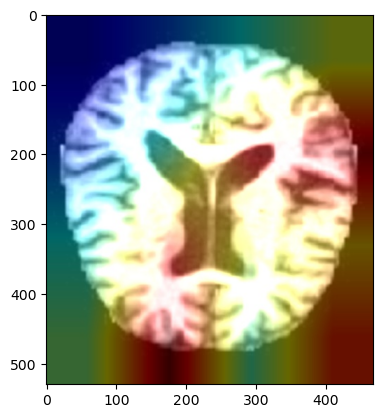

In [36]:
"""import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained model (VGG16 in this example)
base_model = tf.keras.models.load_model("./final_model_02.h5")
model = Model(inputs=base_model.input, outputs=base_model.get_layer('conv2d_2').output)

# Function to generate Grad-CAM
def generate_grad_cam(model, img_path, class_index, layer_name):
    img = keras.preprocessing.image.load_img(img_path, target_size=(150,150))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = keras.applications.vgg16.preprocess_input(img_array)

    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer(layer_name)
        iterate_model = Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate_model(img_array)
        class_output = model_out[:, class_index]

    grads = tape.gradient(class_output, last_conv_layer)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer[0]

    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

# Function to overlay Grad-CAM on the original image
def overlay_grad_cam(img_path, heatmap):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    superimposed_img = heatmap * 0.4 + img

    cv2.imwrite('grad_cam_result.jpg', superimposed_img)

# Specify the path to the image you want to visualize
img_path = './test1_MOD.jpg'

# Specify the target class index
class_index = 1  # Example index for 'zebra' in ImageNet

# Specify the layer name from which to compute Grad-CAM
layer_name = 'conv2d_2'

# Generate Grad-CAM
heatmap = generate_grad_cam(model, img_path, class_index, layer_name)

# Overlay Grad-CAM on the original image
overlay_grad_cam(img_path, heatmap)

# Display the result
result_img = cv2.imread('grad_cam_result.jpg')
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.show()"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          294976    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 64)         0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                      

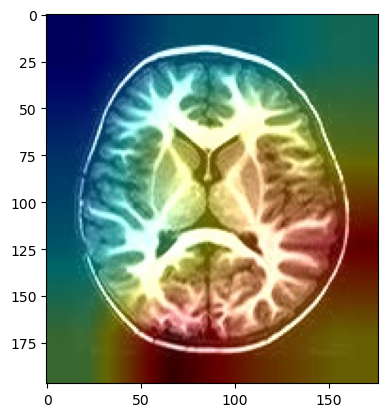

In [40]:

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained model (VGG16 in this example)
base_model = tf.keras.models.load_model("./final_model_02.h5")

# Print the model summary to identify the last layer
base_model.summary()

# Replace 'YOUR_LAST_LAYER_NAME' with the actual name of the last layer
last_layer_name = 'conv2d_2'
model = Model(inputs=base_model.input, outputs=base_model.get_layer(last_layer_name).output)

# Function to generate Grad-CAM
def generate_grad_cam(model, img_path, class_index, layer_name):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer(layer_name)
        iterate_model = Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate_model(img_array)
        class_output = model_out[:, class_index]

    grads = tape.gradient(class_output, last_conv_layer)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer[0]

    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

# Function to overlay Grad-CAM on the original image
def overlay_grad_cam(img_path, heatmap):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    superimposed_img = heatmap * 0.4 + img

    cv2.imwrite('./GRAD/grad_cam_result.jpg', superimposed_img)

# Specify the path to the image you want to visualize
img_path = "C:/Users/mayan/Desktop/14 no.jpg"

# Specify the target class index
class_index = 1  # Example index for 'zebra' in ImageNet

# Specify the layer name from which to compute Grad-CAM
layer_name = 'conv2d_2'

# Generate Grad-CAM
heatmap = generate_grad_cam(model, img_path, class_index, layer_name)

# Overlay Grad-CAM on the original image
overlay_grad_cam(img_path, heatmap)

# Display the result
result_img = cv2.imread('./GRAD/grad_cam_result.jpg')
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.show()